## Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
import sys
from ultralytics import YOLO

## Pre-processing
#### - Change RGB image to grayscale
#### - Crop specific picture
#### - Resize picture

In [2]:
# display by matplotlib
def display(im_path):
    dpi = 80
    im_data = plt.imread(im_path)
    height, width  = im_data.shape[:2]
    figsize = width / float(dpi), height / float(dpi)
    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0, 0, 1, 1])
    ax.axis('off')
    ax.imshow(im_data, cmap='gray')
    plt.show()

In [3]:
# display by cv
ESC = 27
def display_path(path):
    if os.path.exists(path) is False:
        print("file doesn't exist")
        return
    img = cv2.imread(path)
    if img is None:
        print("can't open img or doesn't have img")
        return 
    print("Hello")
    cv2.imshow("img", img)
    while True:
        if cv2.waitKey(1) & 0xFF == ESC: 
            break
    cv2.destroyAllWindows()

In [4]:
# display by cv
ESC = 27
def display_img(img):
    if img is None:
        print("can't open img or doesn't have img")
        return 
    cv2.imshow("img", img)
    while True:
        if cv2.waitKey(1) & 0xFF == ESC: 
            break
    cv2.destroyAllWindows()

In [5]:
# list file
input_path = "../Input-test/"
output_path = "../Output/"
input_files = os.listdir(input_path)
# input_files

In [6]:
# get path of all image
paths = []
for files in input_files:
    paths.append(os.path.join(input_path + files))

In [7]:
paths

['../Input-test/6.jpg',
 '../Input-test/9.jpg',
 '../Input-test/chang_thh.jpg',
 '../Input-test/8.jpg',
 '../Input-test/5.jpg',
 '../Input-test/1.jpg',
 '../Input-test/plain-text.png',
 '../Input-test/Nestle.jpg',
 '../Input-test/10.jpg',
 '../Input-test/2.jpg',
 '../Input-test/images.jpg',
 '../Input-test/Chang_beer.jpg']

In [8]:
print(*(path.split('/')[-1] for path in paths))

6.jpg 9.jpg chang_thh.jpg 8.jpg 5.jpg 1.jpg plain-text.png Nestle.jpg 10.jpg 2.jpg images.jpg Chang_beer.jpg


In [34]:
# crop specifc bottle
# model = YOLO('yolov5s.pt')
model = YOLO('yolov5su.pt')
def crop_bottle(image, filename):
    if len(image.shape) == 2:  # Grayscale images have shape (height, width)
        # Convert grayscale to 3-channel grayscale by stacking it 3 times
      image = np.stack(3 * [image], axis=-1)
    results = model(image)
    res = []
    if isinstance(results, list):
        for i in range(len(results)): #total of picture
            for box in results[i].boxes.data: # total of object in 1 picture
                x1, y1, x2, y2, conf, cls = map(float, box)
                name = results[i].names[cls]
                # if conf > 0.80: # majic
                if name == "bottle":
                    x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)
                    img = image[y1:y2, x1:x2]
                    res.append(img)

                  # display specific rectangle , name and conf
                    name = results[i].names[cls]
                    cv2.rectangle(image, (x1, y1), (x2, y2), (255, 0, 255), 5)
                    cv2.putText(image, str(conf), (50, 100), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
                    cv2.putText(image, str(name), (50, 200), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
                    cv2.imwrite(output_path + filename.split('/')[-1] ,image)
                    # display_img(image)
                 # for check error
                # else:
                    # x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)
                    # img = image[y1:y2, x1:x2]
                    # res.append(img)
                    # name = results[i].names[cls]
                    # cv2.rectangle(image, (x1, y1), (x2, y2), (255, 0, 255), 5)
                    # cv2.putText(image, str(conf), (50, 100), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
                    # cv2.putText(image, str(name), (50, 200), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
                    # cv2.imwrite(output_path + filename.split('/')[-1] ,image)
                    # print("confident less than 0.85")
                    # return(res)
        return(res)
    else:
      print("not plate")

In [35]:
path = "../Input-test/Nestle.jpg"
img = cv2.imread(path)
if img is not None:
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    if gray_img is not None:
    # gray_img_resized = cv2.resize(gray_img, target_size)
        crop_bottle(img, path)
else:
    print("Img can't open")


0: 640x512 1 bottle, 5.8ms
Speed: 1.1ms preprocess, 5.8ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 512)


In [28]:
# using append() with a list
gray_imgs = []
target_size = (100, 100)
for path in paths:
    img = cv2.imread(path)
    if img is not None:
        gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        if gray_img is not None:
    # gray_img_resized = cv2.resize(gray_img, target_size)
            crop_imgs = crop_bottle(gray_img, path)
            for crop_img in crop_imgs: # In case it have more than 1 object
                gray_imgs.append(crop_img)
        else:
            print("Can't convert color")
    else:
        print("Can't open image")
gray_imgs
# gray_imgs = np.array(gray_imgs)

crop bottle

0: 192x640 (no detections), 3.8ms
Speed: 10.7ms preprocess, 3.8ms inference, 0.3ms postprocess per image at shape (1, 3, 192, 640)
crop bottle

0: 416x640 (no detections), 7.2ms
Speed: 1.8ms preprocess, 7.2ms inference, 0.4ms postprocess per image at shape (1, 3, 416, 640)
crop bottle

0: 640x384 1 bottle, 5.3ms
Speed: 1.3ms preprocess, 5.3ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 384)
bottle
crop bottle

0: 640x640 1 train, 7.4ms
Speed: 1.6ms preprocess, 7.4ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)
crop bottle

0: 512x640 (no detections), 8.0ms
Speed: 1.8ms preprocess, 8.0ms inference, 0.6ms postprocess per image at shape (1, 3, 512, 640)
crop bottle

0: 448x640 (no detections), 7.4ms
Speed: 1.7ms preprocess, 7.4ms inference, 0.6ms postprocess per image at shape (1, 3, 448, 640)
crop bottle

0: 384x640 (no detections), 5.2ms
Speed: 1.2ms preprocess, 5.2ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)
crop b

[array([[[255,   0, 255],
         [255,   0, 255],
         [255,   0, 255],
         ...,
         [255,   0, 255],
         [255,   0, 255],
         [255,   0, 255]],
 
        [[255,   0, 255],
         [255,   0, 255],
         [255,   0, 255],
         ...,
         [255,   0, 255],
         [255,   0, 255],
         [255,   0, 255]],
 
        [[255,   0, 255],
         [255,   0, 255],
         [255,   0, 255],
         ...,
         [255,   0, 255],
         [255,   0, 255],
         [255,   0, 255]],
 
        ...,
 
        [[255,   0, 255],
         [255,   0, 255],
         [255,   0, 255],
         ...,
         [255,   0, 255],
         [255,   0, 255],
         [255,   0, 255]],
 
        [[255,   0, 255],
         [255,   0, 255],
         [255,   0, 255],
         ...,
         [255,   0, 255],
         [255,   0, 255],
         [255,   0, 255]],
 
        [[255,   0, 255],
         [255,   0, 255],
         [255,   0, 255],
         ...,
         [255,   0, 255],
  

## Optinal

In [29]:
# print(type(gray_imgs[0]))
display_img(gray_imgs[0])

In [9]:
img = cv2.imread("./Input-test/Chang_beer.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
thresh, im_bw = cv2.threshold(img, 150, 255, cv2.THRESH_BINARY)
# kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
# binary_image = cv2.morphologyEx(binary_image, cv2.MORPH_CLOSE, kernel)
cv2.imwrite("./Input-test/chang_thh.jpg", im_bw)

True

In [10]:
# display_img(binary_image)
display_img(im_bw)

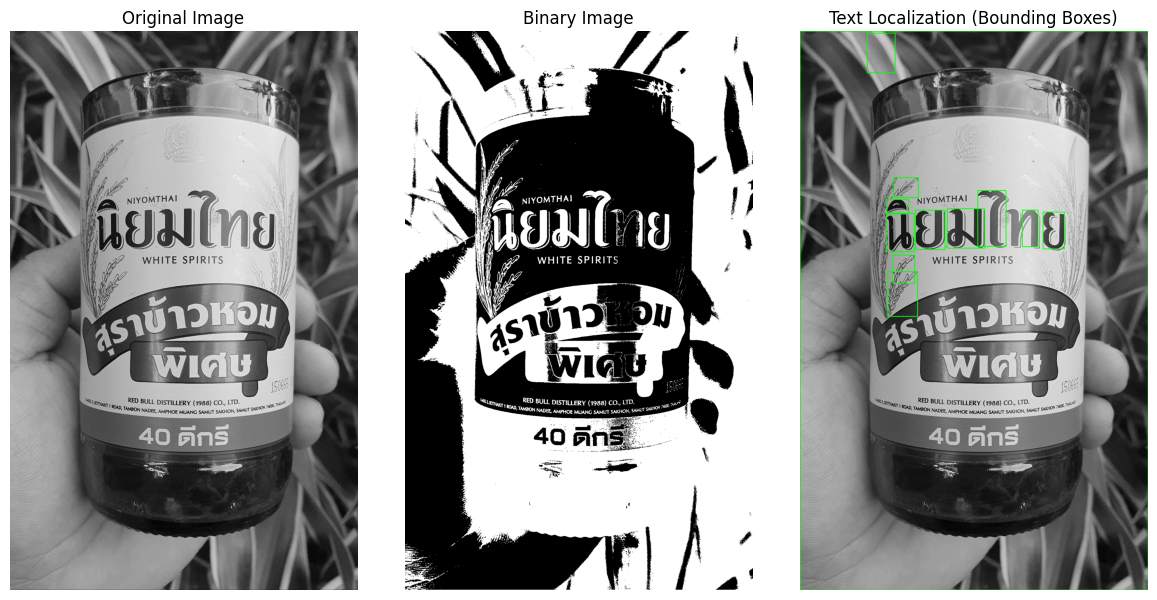

In [53]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.measure import label, regionprops

def text_localization_8_connect(image_path, binarization_threshold=128):
    # Step 1: Load the image in grayscale
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Step 2: Binarize the image (assuming dark text on a light background)
    _, binary_image = cv2.threshold(image, binarization_threshold, 255, cv2.THRESH_BINARY_INV)

    # Step 3: Perform connected component labeling with 8-connectivity
    labeled_image = label(binary_image, connectivity=2)  # 2 for 8-connectivity

    # Step 4: Extract bounding boxes for each connected component
    regions = regionprops(labeled_image)
    bounding_boxes = [region.bbox for region in regions]

    # Step 5: Draw bounding boxes on the original image
    output_image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)  # Convert to RGB for visualization
    for bbox in bounding_boxes:
        min_row, min_col, max_row, max_col = bbox
        area = (max_row - min_row) * (max_col - min_col)
        if area > 4000:  # Filter out small bounding boxes
          # print(f'area : {area}')
          cv2.rectangle(output_image, (min_col, min_row), (max_col, max_row), (0, 255, 0), 2)

    # Step 6: Display the results
    plt.figure(figsize=(12, 6))

    # Original grayscale image
    plt.subplot(1, 3, 1)
    plt.title("Original Image")
    plt.imshow(image, cmap="gray")
    plt.axis("off")

    # Binary image
    plt.subplot(1, 3, 2)
    plt.title("Binary Image")
    plt.imshow(binary_image, cmap="gray")
    plt.axis("off")

    # Labeled image with bounding boxes
    plt.subplot(1, 3, 3)
    plt.title("Text Localization (Bounding Boxes)")
    plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB
    plt.axis("off")

    plt.tight_layout()
    plt.show()

    return bounding_boxes

# Example Usage
# image_path = "../Input-test/Chang_beer.jpg"  # Replace with your image path
# image_path = "../Input-test/ขวด_คริสตัล.png"  # Replace with your image path
# image_path = "../Input-test/ขวด_รวงข้าว.png"  # Replace with your image path
image_path = "../Input-test/ขวด_สุราข้าวหอม3.jpg"  # Replace with your image path
bounding_boxes = text_localization_8_connect(image_path, binarization_threshold=128)

# Print the bounding boxes
# print(f"Detected Bounding Boxes: {bounding_boxes}")


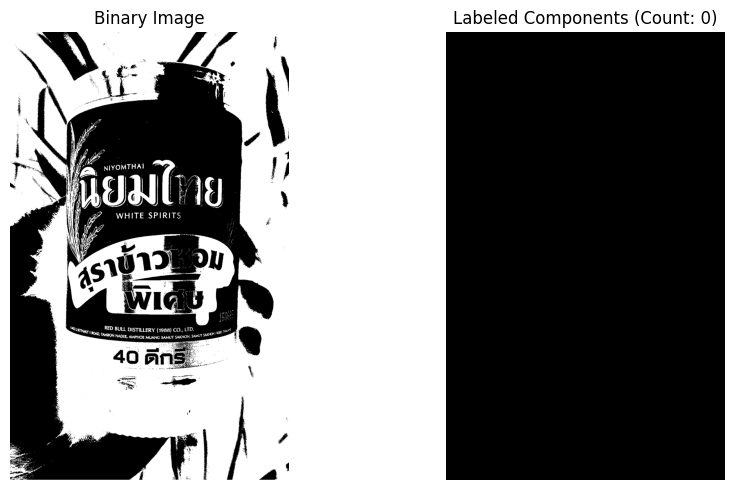

In [55]:
import numpy as np
import matplotlib.pyplot as plt

image_path = "../Input-test/ขวด_สุราข้าวหอม3.jpg"  # Replace with your image path
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
binarization_threshold = 128
    # Step 2: Binarize the image (assuming dark text on a light background)
_, binary_image = cv2.threshold(image, binarization_threshold, 255, cv2.THRESH_BINARY_INV)

# Function for 8-connectivity connected component labeling
def connected_components_8connectivity(binary_image):
    rows, cols = binary_image.shape
    labeled_image = np.zeros_like(binary_image, dtype=int)
    label = 1
    stack = []

    for row in range(rows):
        for col in range(cols):
            if binary_image[row, col] == 1 and labeled_image[row, col] == 0:
                stack.append((row, col))
                while stack:
                    r, c = stack.pop()
                    if labeled_image[r, c] != 0:
                        continue
                    labeled_image[r, c] = label
                    for dr, dc in [(-1, -1), (-1, 0), (-1, 1),
                                   (0, -1),         (0, 1),
                                   (1, -1), (1, 0), (1, 1)]:
                        rr, cc = r + dr, c + dc
                        if 0 <= rr < rows and 0 <= cc < cols:
                            if binary_image[rr, cc] == 1 and labeled_image[rr, cc] == 0:
                                stack.append((rr, cc))
                label += 1
    return labeled_image, label - 1

# Perform connected component labeling
labeled_image, num_components = connected_components_8connectivity(binary_image)

# Plot the results
# fig, axes = plt.subplots(1, 2, figsize=(10, 5))
# axes[0].imshow(binary_image, cmap='gray')
# axes[0].set_title("Binary Image")
# axes[0].axis('off')

# axes[1].imshow(labeled_image, cmap='nipy_spectral')
# axes[1].set_title(f"Labeled Components (Count: {num_components})")
# axes[1].axis('off')

plt.tight_layout()
plt.show()


Input Binary Image:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

Labeled Image:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

Number of Connected Components: 0

Bounding Boxes: []


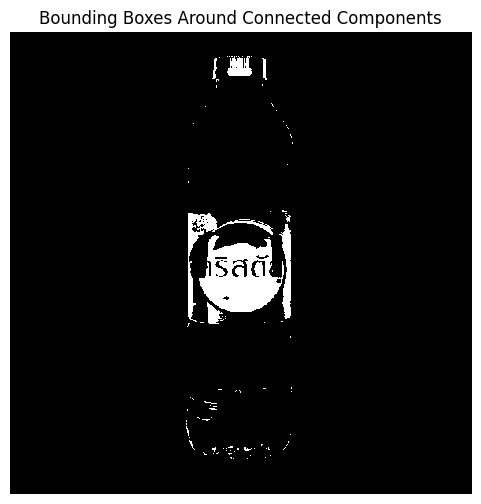

In [58]:
import numpy as np
import matplotlib.pyplot as plt

def connected_components_8connectivity(binary_image):
    """
    Perform connected component labeling using 8-connectivity.
    
    Args:
        binary_image (numpy.ndarray): A binary image (2D array with 0s and 1s).
        
    Returns:
        labeled_image (numpy.ndarray): Image where each connected component has a unique label.
        num_labels (int): Number of connected components found.
        bounding_boxes (list): List of bounding boxes [(min_row, min_col, max_row, max_col)].
    """
    rows, cols = binary_image.shape
    labeled_image = np.zeros_like(binary_image, dtype=int)
    label = 1
    stack = []
    bounding_boxes = []

    for row in range(rows):
        for col in range(cols):
            if binary_image[row, col] == 1 and labeled_image[row, col] == 0:
                # Start a new connected component
                stack.append((row, col))
                min_row, min_col, max_row, max_col = row, col, row, col

                while stack:
                    r, c = stack.pop()

                    if labeled_image[r, c] != 0:
                        continue

                    labeled_image[r, c] = label
                    min_row, min_col = min(min_row, r), min(min_col, c)
                    max_row, max_col = max(max_row, r), max(max_col, c)

                    for dr, dc in [(-1, -1), (-1, 0), (-1, 1),
                                   (0, -1),         (0, 1),
                                   (1, -1), (1, 0), (1, 1)]:
                        rr, cc = r + dr, c + dc
                        if 0 <= rr < rows and 0 <= cc < cols:
                            if binary_image[rr, cc] == 1 and labeled_image[rr, cc] == 0:
                                stack.append((rr, cc))

                # Add bounding box for the current component
                bounding_boxes.append((min_row, min_col, max_row, max_col))
                label += 1

    return labeled_image, label - 1, bounding_boxes


image_path = "../Input-test/ขวด_คริสตัล.png"  # Replace with your image path
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
binarization_threshold = 128
    # Step 2: Binarize the image (assuming dark text on a light background)
_, binary_image = cv2.threshold(image, binarization_threshold, 255, cv2.THRESH_BINARY_INV)

print("Input Binary Image:")
print(binary_image)

# Perform connected component labeling
labeled_image, num_components, bounding_boxes = connected_components_8connectivity(binary_image)

print("\nLabeled Image:")
print(labeled_image)

print(f"\nNumber of Connected Components: {num_components}")
print(f"\nBounding Boxes: {bounding_boxes}")

# Visualize the results
plt.figure(figsize=(6, 6))
plt.imshow(binary_image, cmap='gray', interpolation='nearest')

# Draw bounding boxes
for box in bounding_boxes:
    min_row, min_col, max_row, max_col = box
    plt.gca().add_patch(
        plt.Rectangle(
            (min_col - 0.5, min_row - 0.5),  # Top-left corner
            max_col - min_col + 1,          # Width
            max_row - min_row + 1,          # Height
            edgecolor='red',
            facecolor='none',
            linewidth=2
        )
    )

plt.title("Bounding Boxes Around Connected Components")
plt.axis("off")
plt.show()
